In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import string
from string import punctuation

In [2]:
df = pd.read_csv('PyChallengeKnime.csv')

In [3]:
df

,Tweet,User - Name,User - Followers
0,"RT @MercedesAMGF1: This weekend, @GeorgeRussel...",Nicolò Maganuco,246
1,@MercedesAMGF1 @GeorgeRussell63 @MercedesBenz ...,David Keir,53
2,"RT @MercedesAMGF1: This weekend, @GeorgeRussel...",chrys ✨GEORGE TO MERCEDES✨,562
3,"RT @MercedesAMGF1: This weekend, @GeorgeRussel...",Oliver,11
4,@MercedesAMGF1 @GeorgeRussell63 @MercedesBenz ...,Can #F1,68
...,...,...,...
17397,Audi A1 #AuditTheVote @audisouthafrica @Audi @...,McThamirsa🥇🇿🇦,140
17398,@Jorgii_17 @MLS @Audi @SportingKC They're not ...,Trash Man,315
17399,RT @Jorgii_17: @MLS @Audi @SportingKC He was o...,Trash Man,315
17400,"Niezależnie od tego, czy jest to renomowana pr...",Karolina,106


In [4]:
df.drop(['User - Followers'], axis=1)

,Tweet,User - Name
0,"RT @MercedesAMGF1: This weekend, @GeorgeRussel...",Nicolò Maganuco
1,@MercedesAMGF1 @GeorgeRussell63 @MercedesBenz ...,David Keir
2,"RT @MercedesAMGF1: This weekend, @GeorgeRussel...",chrys ✨GEORGE TO MERCEDES✨
3,"RT @MercedesAMGF1: This weekend, @GeorgeRussel...",Oliver
4,@MercedesAMGF1 @GeorgeRussell63 @MercedesBenz ...,Can #F1
...,...,...
17397,Audi A1 #AuditTheVote @audisouthafrica @Audi @...,McThamirsa🥇🇿🇦
17398,@Jorgii_17 @MLS @Audi @SportingKC They're not ...,Trash Man
17399,RT @Jorgii_17: @MLS @Audi @SportingKC He was o...,Trash Man
17400,"Niezależnie od tego, czy jest to renomowana pr...",Karolina


In [5]:
string = "audiconnect|audiqualitytime|support|bmwservice|justforme|bmwjustforme|mercedesmemaintenance|'engine oil'|service|tires|'accident assistant'|'ultimate cares'|support|assistance|'collision repair center'|genius|myaudi|'at your door'|plus|customization|customized|custom|'quality time'|'audi connect'|'restart & go'|'just for me'|'mercedes me'|warranty|'fast service'|configure|antitheft|battery|connectdrive|'connected drive'|assistant|drivenow|'after sales'"

In [6]:
reduced = df[df['Tweet'].str.contains(string)]

In [7]:
reduced

,Tweet,User - Name,User - Followers
58,@Audi Can I talk to the guy who designed the b...,Mr Kizmo,2570
74,New dual-purpose trucks have gone into service...,Tank Cleaning mag,72
114,RT @Audi: @MrKizmo Hello there. We welcome you...,Sheri,47
118,@MrKizmo Hello there. We welcome you to DM us ...,Audi USA,2078498
131,"RT @MercedesBenz: More dynamic design, sporty ...",Kinuthia✌🏽,82
...,...,...,...
17310,@will_becker @BBCJustinR @BrooklandsMuseu @BMW...,Sathya Urath,5
17341,@MercedesBenz No anyone understand customers pain,Girish Singh,42
17344,@MercedesBenz Very poor and worst response on ...,Girish Singh,42
17376,@BBCJustinR @BrooklandsMuseu @BMW @JaguarUK Fr...,Will Becker,117


In [8]:
reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 58 to 17388
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tweet             542 non-null    object
 1   User - Name       542 non-null    object
 2   User - Followers  542 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.9+ KB


In [9]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

In [10]:
reduced['Tweet'] = reduced['Tweet'].apply(cleanTxt)

<ipython-input-10-c5225b41bcaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced['Tweet'] = reduced['Tweet'].apply(cleanTxt)


In [11]:
reduced = reduced.drop(['User - Followers'], axis=1)

In [12]:
# Subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [13]:
# Create two new columns 'Subjectivity' & 'Polarity'
reduced['Subjectivity'] = reduced['Tweet'].apply(getSubjectivity)
reduced['Polarity'] = reduced['Tweet'].apply(getPolarity)

In [14]:
reduced

,Tweet,User - Name,Subjectivity,Polarity
58,Can I talk to the guy who designed the batter...,Mr Kizmo,0.000000,0.000000
74,New dual-purpose trucks have gone into service...,Tank Cleaning mag,0.454545,0.136364
114,: Hello there. We welcome you to DM us if we ...,Sheri,0.900000,0.800000
118,Hello there. We welcome you to DM us if we ca...,Audi USA,0.900000,0.800000
131,": More dynamic design, sporty aura and next ge...",Kinuthia✌🏽,0.324242,0.227273
...,...,...,...,...
17310,_becker sorry i just realised you were ref...,Sathya Urath,1.000000,-0.500000
17341,No anyone understand customers pain,Girish Singh,0.000000,0.000000
17344,Very poor and worst response on your customer...,Girish Singh,0.890000,-0.760000
17376,From the Q&A on the BBC website: If you ov...,Will Becker,0.608929,0.154762


Through this plot we are able to see all the most used words inside all the tweets.

In [15]:
allWords = ' '.join([twts for twts in reduced['Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

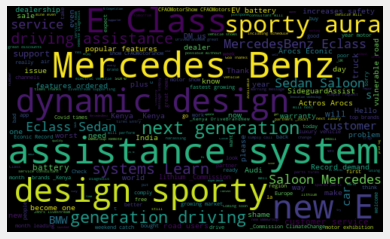

In [16]:
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Create a function to compute the negative (-1), neutral (0), and positive (+1) analysis, and add the information to a new column called Analysis. Then, show the results.

In [17]:
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

In [18]:
reduced['Analysis'] = reduced['Polarity'].apply(getAnalysis)

It's necessary to reset all the indices since most of the original df were dropped

In [19]:
reduced = reduced.reset_index()
reduced

,index,Tweet,User - Name,Subjectivity,Polarity,Analysis
0,58,Can I talk to the guy who designed the batter...,Mr Kizmo,0.000000,0.000000,Neutral
1,74,New dual-purpose trucks have gone into service...,Tank Cleaning mag,0.454545,0.136364,Positive
2,114,: Hello there. We welcome you to DM us if we ...,Sheri,0.900000,0.800000,Positive
3,118,Hello there. We welcome you to DM us if we ca...,Audi USA,0.900000,0.800000,Positive
4,131,": More dynamic design, sporty aura and next ge...",Kinuthia✌🏽,0.324242,0.227273,Positive
...,...,...,...,...,...,...
537,17310,_becker sorry i just realised you were ref...,Sathya Urath,1.000000,-0.500000,Negative
538,17341,No anyone understand customers pain,Girish Singh,0.000000,0.000000,Neutral
539,17344,Very poor and worst response on your customer...,Girish Singh,0.890000,-0.760000,Negative
540,17376,From the Q&A on the BBC website: If you ov...,Will Becker,0.608929,0.154762,Positive


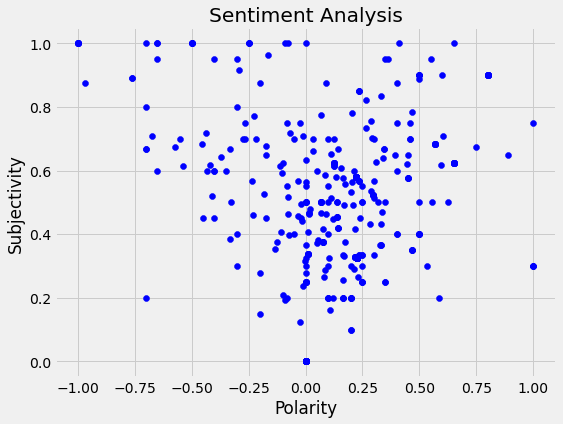

In [20]:
# Plotting Subjectivity vs Polarity
plt.figure(figsize=(8,6)) 
for i in range(0, reduced.shape[0]):
  plt.scatter(reduced["Polarity"][i], reduced["Subjectivity"][i], color='Blue') 

plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [21]:
reduced['Analysis'].value_counts()

Positive    377
Negative     96
Neutral      69
Name: Analysis, dtype: int64

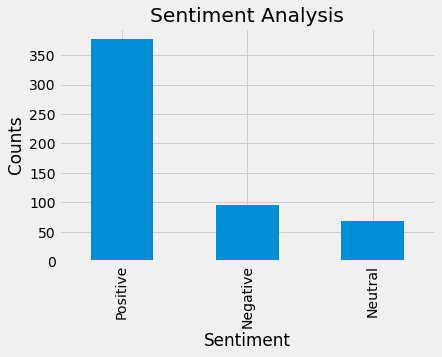

In [22]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
reduced['Analysis'].value_counts().plot(kind = 'bar')
plt.show()